<h1 style="font-size:300%; font-family:cursive; background:lightcoral; color:white; text-align:center; border:10px solid ; padding:25px;">Stroke Prediction</h1>

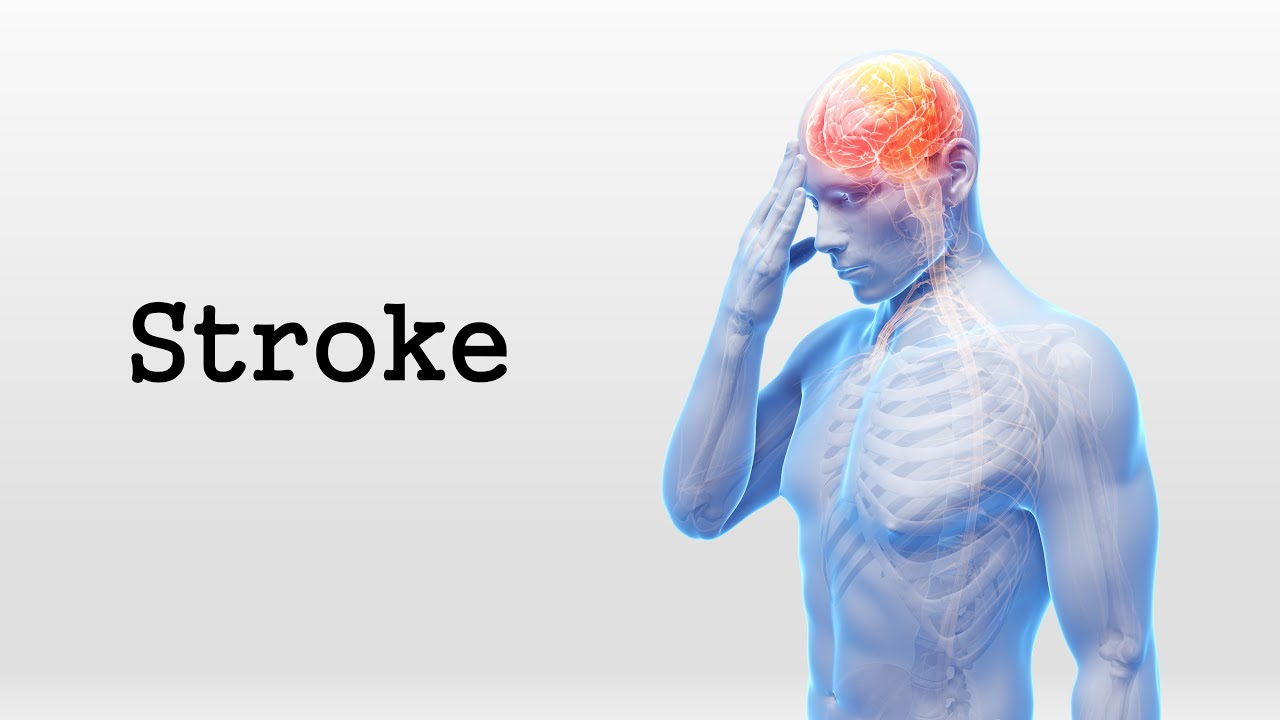

<h2 style="font-size:250%; font-family:cursive; color:lightcoral;"><b>Problem Statement:</b><h2>
<p style="font-size:100%; font-family:Verdana">According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.</p>
 
<p style="font-size:100%; font-family:Verdana"> So the objective of this project is to predict  whether a patient is likely to get stroke  or not</p>
    
    
<h2 style="font-size:250%; font-family:cursive; color:lightcoral;"><b>About Dataset:</b><h2>
<ul>
    <li style="font-size:80%; font-family:Courier New"><b>id:</b> unique identifier</li>
    <li style="font-size:80%; font-family:Courier New"><b>gender:</b> "Male", "Female" or "Other"</li>  
    <li style="font-size:80%; font-family:Courier New"><b>age:</b>age of the patient</li>
    <li style="font-size:80%; font-family:Courier New"><b>hypertension:</b>0 if the patient doesn't have hypertension, 1 if the patient has hypertension</li>
    <li style="font-size:80%; font-family:Courier New"><b>heart_disease:</b> 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</li>
    <li style="font-size:80%; font-family:Courier New"><b>ever_married:</b> "No" or "Yes"</li>
    <li style="font-size:80%; font-family:Courier New"><b>work_type:</b> "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"</li>
    <li style="font-size:80%; font-family:Courier New"><b>Residence_type:</b>"Rural" or "Urban".</li>
    <li style="font-size:80%; font-family:Courier New"><b>bmi:</b>  body mass index.</li>
    <li style="font-size:80%; font-family:Courier New"><b>smoking_status:</b> "formerly smoked", "never smoked", "smokes" or "Unknown"(means information is unavailable for this patient).</li>
    <li style="font-size:80%; font-family:Courier New"><b>stroke:</b> 1 if the patient had a stroke or 0 if not.</li>
</ul>    

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Import Libraries & Load Dataset</b></h3></center>

In [ ]:
import os
import numpy as np 
import pandas as pd 
import missingno as msno


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('seaborn')


from scipy.stats import norm

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report,roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")


In [ ]:
data.head()

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Descriptive Statistics of Data</b></h3></center>

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.describe().T

<ul>
    <li style="font-size:180%; font-family:Verdana;">In our dataset,we have columns with int,object and float datatypes and there are some missing values in bmi column also</li>
</ul>

In [ ]:
# create list of columns with numerical datatype and categorical data type
cat = [x for x in data.columns if data[x].dtype == "O"]
num = [x for x in data.columns if x not in cat]


<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Handle the Columns with Missing values</b></h3></center>

In [ ]:

msno.bar(data,color=['magenta'])
plt.show()


In [ ]:
percentage = data['bmi'].isnull().sum()/len(data.bmi)
print('Missing value ',percentage*100)

<h4 style="font-size:150%; font-family:cursive; color:lightcoral;"><b> Handle bmi Column</b></h4>

In [ ]:
data['bmi_null'] = np.where(data['bmi'].isnull(),1,0)
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [ ]:
# confirm missing values
data.isnull().sum()

<p style="font-size:180%; font-family:Verdana; text-align:center;"><b>"MISSING VALUES ARE HANDLED"</b></p>

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> EDA </b></h3></center>

<h4 style="font-size:150%; font-family:cursive; color:lightcoral;"><b> Target variable (stroke)</b></h4>

In [ ]:
labels=["stroke","not stroke"]
data.stroke.value_counts().plot(kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.1, figsize=(8,8),colors=['olive','magenta'])

In [ ]:
sns.countplot(data.stroke)

<p style="font-size:180%; font-family:Verdana;"><b>Target feature is completely imbalanced </b></p>

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Gender </b></h3></center>

In [ ]:
sns.countplot(x='gender',data=data,palette='Set2')

In [ ]:
# since other is just a outlier for our future model so we will drop it
data = data.drop(data[data['gender'] == 'Other'].index)

In [ ]:
label=[x for x in data.gender.unique()]
value = [x for x in data.gender.value_counts()]
fig = go.Figure(data=[go.Pie(labels=label, values=value, hole=.6)])
fig.show()

In [ ]:


ax1=sns.countplot(data=data,x='gender',hue='stroke',palette='Set2')
plt.title('gender vs stroke')

In [ ]:
sns.catplot(x='gender',y='age',col='stroke',data=data)
plt.show()

In [ ]:
sns.catplot(col='gender',hue='heart_disease',x='stroke',data=data,
            kind="count")
plt.show()

In [ ]:
sns.catplot(col='heart_disease',x='gender',hue='stroke',data=data,palette={0: "g", 1: "m"},
            kind="count")
plt.show()

In [ ]:

sns.catplot(x='gender',col='stroke',hue='Residence_type',data=data,kind='count',palette='husl')
plt.show()

In [ ]:
sns.catplot(x='gender',col='stroke',hue='work_type',data=data,kind='count')
plt.show()

In [ ]:
sns.catplot(x='gender',col='stroke',y='avg_glucose_level',data=data,kind='swarm',palette='husl')
plt.show()



In [ ]:
sns.catplot(x='gender',col='stroke',y='bmi',data=data,kind='boxen',palette='husl')
plt.show()



In [ ]:
sns.catplot(x='gender',hue='smoking_status',data=data,col='stroke',kind='count',palette='husl')

In [ ]:
data.groupby(['gender','stroke'])['stroke'].count()

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Ever Married </b></h3></center>

In [ ]:
sns.countplot(x='ever_married',data=data,palette='plasma')

In [ ]:
label=[x for x in data.ever_married.unique()]
data.ever_married.value_counts().plot(kind='pie',labels=label,subplots=True,autopct='%1.0f%%',labeldistance=1.2, figsize=(4,4),colors=['lime','plum'])

In [ ]:

sns.countplot(data=data,x='ever_married',hue='stroke',palette='Accent')
plt.title('ever_married vs stroke')

In [ ]:
sns.catplot(data=data,x='ever_married',hue='stroke',palette='Accent',col='work_type',kind='count')
plt.title('ever_married vs stroke')

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Work Type </b></h3></center>

In [ ]:
sns.countplot(x='work_type',data=data,palette='Set1')

In [ ]:
label=[x for x in data.work_type.unique()]
value = [x for x in data.work_type.value_counts()]
fig = go.Figure(data=[go.Pie(labels=label, values=value, hole=.3)])
fig.show()


In [ ]:
data.groupby(['work_type','stroke'])['stroke'].count()

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(data=data,y='work_type',hue='stroke',palette="pastel", edgecolor=".6")
plt.xticks(rotation=45)
plt.title('work_type vs stroke')

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Residence type </b></h3></center>

In [ ]:
sns.countplot(x='Residence_type',data=data,palette='twilight')

In [ ]:
label=[x for x in data.Residence_type.unique()]
data.Residence_type.value_counts().plot(kind='pie',labels=label,subplots=True,autopct='%1.0f%%',labeldistance=1.2, figsize=(5,5),colors=['Blue','hotpink'])

In [ ]:


sns.countplot(data=data,x='Residence_type',hue='stroke',palette='Reds')
plt.xticks(rotation=45)
plt.title('Residence_type vs stroke')
plt.show()

In [ ]:
sns.catplot(data=data,x='Residence_type',hue='stroke',col='ever_married',palette='inferno',kind='count')

In [ ]:
sns.catplot(data=data,x='Residence_type',hue='stroke',y='bmi',palette='inferno',kind='boxen')

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Smoking status </b></h3></center>


In [ ]:
sns.countplot(x='smoking_status',data=data,palette='coolwarm')

In [ ]:
label=[x for x in data.smoking_status.unique()]
value = [x for x in data.smoking_status.value_counts()]
fig = go.Figure(data=[go.Pie(labels=label, values=value, hole=.4)])
fig.show()

In [ ]:
sns.countplot(data=data,x='smoking_status',hue='stroke',palette='Pastel1')
plt.title('smoking_status vs stroke')
plt.xticks(rotation=45)
plt.show()


<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Age </b></h3></center>

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.distplot(data.age,color='mediumorchid',rug=True)
plt.title('Distribution of Age')

plt.subplot(1,2,2)
sns.distplot(data.age,color='firebrick',rug=True,fit=norm)
plt.title('Normalization w.r.t Age')
plt.show()

In [ ]:
# age
fig = px.box(data, x="stroke", y="age", points="all")
fig.show()

In [ ]:
sns.catplot(y='age',data=data,x='smoking_status',col='stroke')

In [ ]:
sns.catplot(y='age',data=data,x='smoking_status',hue='hypertension',col='stroke')

In [ ]:
sns.catplot(y='age',data=data,x='ever_married',hue='stroke',kind='point')
sns.catplot(y='age',data=data,x='ever_married',col='stroke',kind='boxen')



In [ ]:
sns.catplot(y='age',data=data,x='stroke',col='Residence_type',kind='boxen')



In [ ]:
sns.catplot(y='age',data=data,hue='stroke',col='Residence_type',x='heart_disease',kind='box',palette='husl')

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Average Glucose level </b></h3></center>

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.distplot(data.avg_glucose_level,color='hotpink',rug=True)
plt.title('Distribution of avg_glucose_level')

plt.subplot(1,2,2)
sns.distplot(data.avg_glucose_level,color='dodgerblue',rug=True,fit=norm)
plt.title('Normalization w.r.t avg_glucose_level')
plt.show()

In [ ]:

fig = px.box(data, x="stroke", y="avg_glucose_level", points="all")
fig.show()

In [ ]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=data)

In [ ]:
sns.kdeplot(data=data,y='avg_glucose_level',hue='stroke',x='bmi',palette='inferno')

In [ ]:
sns.jointplot(data=data,y='avg_glucose_level',hue='stroke',x='bmi',palette='gnuplot')

In [ ]:
sns.catplot(y='avg_glucose_level',x='smoking_status',hue='stroke',palette='gnuplot',data=data,kind='violin')

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Hypertension </b></h3></center>

In [ ]:
sns.countplot(data=data,x='hypertension',palette='cividis')

In [ ]:

sns.countplot(data=data,x='hypertension',hue='stroke',palette='plasma')
plt.title('hypertension vs stroke')

In [ ]:
sns.catplot(data=data,x='work_type',hue='stroke',col='hypertension',kind='count',palette='husl')

In [ ]:
sns.swarmplot(data=data,y='avg_glucose_level',hue='stroke',x='hypertension',palette='rainbow')

In [ ]:
sns.catplot(data=data,y='avg_glucose_level',col='stroke',x='hypertension',kind='box',palette='rainbow')

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Heart disease  </b></h3></center>

In [ ]:
sns.countplot(data=data,x='heart_disease',palette='terrain')

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=data,x='heart_disease',hue='stroke',palette='Set1')
plt.title('heart_disease vs stroke')

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> BMI </b></h3></center>

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.distplot(data.bmi,color='olive',rug=True)
plt.title('Distribution of bmi')

plt.subplot(1,2,2)
sns.distplot(data.bmi,color='darkgray',rug=True,fit=norm)
plt.title('Normalization w.r.t bmi')
plt.show()

In [ ]:
sns.catplot(y='bmi',data=data,x='stroke',kind='point',height = 6, aspect =2)
plt.show()

In [ ]:
sns.catplot(y='bmi',data=data,x='stroke',kind='bar',height = 6, aspect =2)

In [ ]:
sns.catplot(y='bmi',data=data,x='stroke',hue='ever_married',kind='bar',height = 6, aspect =2)

<h4 style="font-size:150%; font-family:cursive; color:teal;"><b>Findings from EDA</b></h4>

<ul>
     <li style="font-size:130%; font-family:Verdana;color:navy;">Female and male both have equal number of stroke cases while there is not any single case of stroke in other gender type.</li>
     <li style="font-size:130%; font-family:Verdana;color:navy;">There are more number of stroke cases found in married person comparibly to unmarried</li>
    <li style="font-size:130%; font-family:Verdana;color:navy;">Patient with private job have more number stroke cases then self employed and govt. job</li>
     <li style="font-size:130%; font-family:Verdana;color:navy;">There are few cases of strokes in children and those who are unemployed having no case</li>
        <li style="font-size:130%; font-family:Verdana;color:navy;">Both Urban and rural have equal number of stroke cases.so this is not a useful feature .</li>
    <li style="font-size:130%; font-family:Verdana;color:navy;">Most of stroke cases belong to 60-80 age group that means most of patients are in their older age.</li>
    <li style="font-size:130%; font-family:Verdana;color:navy;">Patients with stroke having heigher avg_glucose_level then 120.</li>
    <li style="font-size:130%; font-family:Verdana;color:navy;">normaly person who smoke are more likely have a chance of stroke but in our dataset smoking doesn't have much impact on stroke.but we combine the smoker type in dataset then we can get some useful information </li>
</ul>

<center><h3 style="font-size:200%; font-family:cursive; color:lightcoral;"><b> Data Pre-processing </b></h3></center>


In [ ]:
data.head()

<p style="font-size:180%; font-family:Verdana;"><b>Id column is not useful so we will drop it </b></p>

In [ ]:
data.drop('id',inplace=True,axis=1)

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Label Encoding </b></h4>


In [ ]:
le =LabelEncoder()
le.fit(data.gender)
data['gender']=le.transform(data.gender)
data['ever_married']=le.fit_transform(data.ever_married)
data['work_type']=le.fit_transform(data.work_type)
data['Residence_type']=le.fit_transform(data.Residence_type)
data['smoking_status']=le.fit_transform(data.smoking_status)


<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Feature Scaling </b></h4>


In [ ]:
feat = ['age','avg_glucose_level','bmi']
ss=StandardScaler()
data[feat]=ss.fit_transform(data[feat])


In [ ]:
data[feat]

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> One-hot encoding</b></h4>


In [ ]:
feat_dummy = [x for x in data.columns if x not in feat ]
feat_dummy.remove('stroke')
data = pd.get_dummies(data=data,columns=feat_dummy,drop_first=True)


In [ ]:
data.shape


<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Dataset split</b></h4>


In [ ]:
x=data.drop('stroke',axis=1)
y=data.stroke

In [ ]:
# Train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=31)
print('x train shape: ',x_train.shape)
print('x test shape: ',x_test.shape)
print('y train shape: ',y_train.shape)
print('y test shape: ',y_test.shape)

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

<p style="font-size:180%; font-family:Verdana;color:peru;"><b>Now both training and test data is cleaned and preprocessed, let's start with model building. </b></p>

<center><h3 style="font-size:250%; font-family:cursive; color:lightcoral;"><b> Models </b></h3></center>


**We already know that our dataset is imbalanced so we will also use Stratified Kfold with normal score**

**Stratified-Kfold: It is a cross validation technique which helps us to split our dataset in folds for training and Validation purpose for imbalance dataset.**

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Logistic Regression</b></h4><center>


In [ ]:
# lists for storing model scores
nc=[]    # normal classifier
hpr=[]   # Hyperparameter Tuning score
skfc=[]  # stratified kfold score

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
# Using Train test split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)
score_lr=accuracy_score(y_test,y_lr_pred)*100
print("accuracy score: ",accuracy_score(y_train,lr.predict(x_train))*100)
print("accuracy score: ",score_lr)

print(f"Confusion Matrix :- \n {confusion_matrix(y_test,y_lr_pred)}")
print(f"Classiication Report : -\n {classification_report(y_test, y_lr_pred)}")


<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Hyperparameter tuning</b></h4>


In [ ]:
# hyper parameter tuning of logistic regression

grid_param = {
    'penalty': ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10]
}

grid_search_lr = GridSearchCV(lr, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_lr.fit(x_train, y_train)


In [ ]:
# best parameters and best score

print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)


In [ ]:
# best estimator

lr = grid_search_lr.best_estimator_

# accuracy score, confusion matrix and classification report of logistic regression

lr_acc = accuracy_score(y_test, lr.predict(x_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(x_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(x_test))}")
print(f"Classofocation Report : -\n {classification_report(y_test, lr.predict(x_test))}")
nc.append(lr_acc*100)

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
# define function
def train_skf(model):
    pred_test_full =0
    cv_score =[]
    i=1
    for train_index,test_index in skf.split(x,y):
        print('{} of KFold {}'.format(i,skf.n_splits))
        xtr,xvl = x.iloc[train_index],x.iloc[test_index]
        ytr,yvl = y.iloc[train_index],y.iloc[test_index]

        #model
        
        model.fit(xtr,ytr)
        score = accuracy_score(yvl,model.predict(xvl))*100
        print('accuracy score:',score)
        cv_score.append(score)    
        pred_test = model.predict_proba(x_test)[:,1]
        pred_test_full +=pred_test
        i+=1
    
    return np.mean(cv_score)
    
    
    


In [ ]:
#print(np.mean(cv_score))
lr=LogisticRegression(C=0.001)
skfc.append(train_skf(lr))

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> KNN </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(x_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(x_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(x_test))}")

nc.append(knn_acc*100)

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using skfold </b></h4>


In [ ]:
# skfold knn
skfc.append(train_skf(knn))
hpr.append('No hpr')

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Decision Tree </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")



<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Hyperparameter </b></h4>


In [ ]:
# hyper parameter tuning
# hyper parameter tuning of decision tree 

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(x_train, y_train)


In [ ]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

In [ ]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")
nc.append(dtc_acc*100)

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
# skfold for Dt

skfc.append(train_skf(dtc))

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Random Forest Classifier </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, rd_clf.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(x_test))}")

nc.append(rd_clf_acc*100)

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
skfc.append(train_skf(rd_clf))
hpr.append('no hpr')

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Adaboost Classifier </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(x_test))}")



<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Hyperparameter </b></h4>


In [ ]:
# hyper parameter tuning ada boost

grid_param = {
    'n_estimators' : [100, 120, 150, 180, 200],
    'learning_rate' : [0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(ada, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_ada.fit(x_train, y_train)

In [ ]:
# best parameter and best score

print(grid_search_ada.best_params_)
print(grid_search_ada.best_score_)


In [ ]:
ada = grid_search_ada.best_estimator_

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(x_test))}")

nc.append(ada_acc*100)

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
skfc.append(train_skf(ada))

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Gradient Boosting Classifier </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, gb.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(x_test))}")
nc.append(gb_acc*100)

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
skfc.append('no Skfold')

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Stochastic Gradient Boosting (SGB) </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, sgb.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(x_test))}")
nc.append(sgb_acc*100)
hpr.append('no hpr')

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold</b></h4>


In [ ]:
skfc.append(train_skf(sgb))

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> XgBoost </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, xgb.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(x_test))}")
nc.append(xgb_acc*100)
hpr.append('no hpr')

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
# skfold 
skfc.append(train_skf(xgb))

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Cat Boost Classifier </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(x_train, y_train)

In [ ]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, cat.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(x_test))}")
nc.append(cat_acc*100)
hpr.append('no hpr')

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
skfc.append(train_skf(cat))

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Extra Trees Classifier </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, etc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(x_test))}")

nc.append(etc_acc*100)
hpr.append('no hpr')

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
skfc.append(train_skf(etc))

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> LGBM Classifier </b></h4><center>

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Train test split </b></h4>


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, lgbm.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(x_test))}\n")
print(classification_report(y_test, lgbm.predict(x_test)))
nc.append(lgbm_acc*100)
hpr.append('no hpr')

<h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Using Skfold </b></h4>


In [ ]:
skfc.append(train_skf(lgbm))

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Voting Classifier</b></h4><center>

**A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.**

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Gradient Boosting Classifier', gb), ('Stochastic Gradient Boosting', sgb),  ('Cat Boost Classifier', cat), 
               ('XGboost', xgb),  ('Decision Tree', dtc), ('Extra Tree', etc), ('Light Gradient', lgbm),
               ('Random Forest', rd_clf), ('Ada Boost', ada), ('Logistic', lr)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(x_train, y_train)


In [ ]:
#accuracy score, confusion matrix and classification report of voting classifier

vc_acc = accuracy_score(y_test, vc.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, vc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {vc_acc} \n")

print(f"{confusion_matrix(y_test, vc.predict(x_test))}\n")
print(classification_report(y_test, vc.predict(x_test)))
nc.append(vc_acc*100)
hpr.append('no hpr')


In [ ]:

skfc.append('no skfold')

In [ ]:
hpr.append('hpr')

<center><h4 style="font-size:200%; font-family:cursive; color:olive;"><b> Model Comparison</b></h4><center>

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier','LGBM', 'Voting Classifier'],
})
models['normal_score']= nc
models['S-kfold']=skfc




#models.sort_values(by = 'Score', ascending = False)

In [ ]:
models

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='Model',x='normal_score',palette='inferno',data=models)

<center><h3 style="font-size:250%; font-family:cursive; color:lightcoral;"><b> Thanks...If you like my work. Please give Upvote and Feel free to give your opinion and suggestions </b></h3></center>
